# **A Beginner's Guide to Data Analysis and Visualization**
# *~ Datascience in Marketing & Advertising  *
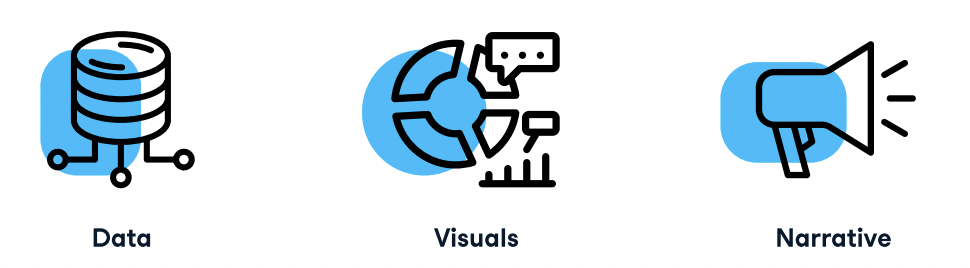
---

### ~ **Riya Joshi**
### Designation : Associate Software Engineer ( Data Science )
### Company : Rebid
### Email : riya.joshi@rebid.co



---



# **Data Science & Machine Learning LifeCycle**



1.   Data Acquisition
2.   Data Pre-processing
3.   Data Analysis
4.   Data Engineering
5.   Model Development
6.   Project Deployment & Serving



## **Scenario** ⛑:
As a junior data analyst working closely with the marketing and customer success teams in an ABC company , you've been informed that recent marketing initiatives have underperformed. Analyze the data collection to comprehend this challenge and provide data-driven solutions to the team.

## **Problem Statement** 📋: 
ABC wants to boost conversion/ sales of a certain product called X. The marketing initiatives, which are essentially advertisements posted on various websites, YouTube, Facebook, Instagram, and other platforms for the promotion of this product X, perform poorly and need to be enhanced.The ABC firm needs to anticipate the CTR of the ads running in the following days so that performance or factors may be enhanced or tweaked to improve performance and increase conversions.

## **Business Key Task** ✅: 
Identify the business task , consider the key stakeholders , identify what data to work upon . 

## **Deliverables** 🕚: 
Deriving actionable insights for the clients and providing a predictive model for CTR trends for next 10 days.

## **Action** 🔧: 
What factors in particular do you suggest to clients ? What are your final conclusions based on your analysis ? Is there any additional data that you could have used to see influence on your target variable or to expand your findings ?



---




## **Data Definition**

*   **campaign_item_id** : unique id of each adevertising campaign
*   **no_of_days** : number of days campaign has been running
*   **time** : timestamp on which the data was captured
*   **ext_service_id** : id of each advertising platforms used
*   **ext_service_name** : name of each advertising platforms used
*   **creative_id** : id of the creative images used for ads
*   **creative_height** : height of the creative image for the ad in pixels
*   **creative_width** : width of the creative image for the ad in pixels
*   **search_tags** : search tags used for displaying ads
*   **template_id** : template used in the creative image
*   **landing_page** : landing page url on which users clicked or browsed through
*   **advertiser_id** : id of the advertiser
*  **advertiser_name** : name of the place of the advertiser ( city , country , state )
*  **network_id** : id of the each agency
*  **advertiser_currency** : currency of the country in which the advertiser operates in
*  **channel_id** : id of each channel used for placed ads
*  **channel_name** : name of the channel ( display , search , social , mobile video )
*  **max_bid_cpm** : maximum value of bid for optimizing cpm
*  **campaign_budget_usd** : overall budget of the campaign or the amount of money that the campaign can spend
*  **impressions** : the number of times an advertisement is displayed on a website or social media platform.
*  **clicks** : the number of times an advertisement is clicked on by a user, leading them to the advertiser's website or landing page.
*  **currency_code** : the currency code of the advertiser
*  **exchange_rate** : a relative price of one currency expressed in terms of another currency.
*  **media_cost_usd** : the amount of money that the campaign has spent on that particuar day
*  **position_in_content** : position where the ad was placed on the website page
*  **unique_reach** : the number of unique users who see your post or page.
*  **total_reach** : the number of people who saw any content from your page or about your page.
*  **search_tags** : a word or set of words a person enters when searching on Google or one of our Search Network sites.
*  **cmi_currency_code** : campaign currency code
*  **time_zone** : timezone in which the campaign is running
*  **weekday_cat** : weekday / weekend catgeory
*  **keywords** : a word or set of words that Google Ads advertisers can add to a given ad group so that your ads are targeting the right audience.














### **Import Required Libraries**

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd

import pandas_profiling as pp

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

import warnings # to avoid warnings
warnings.filterwarnings('ignore')


In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

### **Load the dataset**

In [4]:
# Read Dataset
df=pd.read_csv("/kaggle/input/myfiles/dataset.csv",low_memory=False)

# First 5 rows of dataframe
df.head(5)

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,landing_page,advertiser_id,advertiser_name,network_id,approved_budget,advertiser_currency,channel_id,channel_name,max_bid_cpm,network_margin,campaign_budget_usd,impressions,clicks,stats_currency,currency_code,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,32,Mobile,NaN,0.0,652.173913,837,8,SGD,SGD,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/women/costume-jewelry/,4756,Web,190,400.0,SGD,8,Social,NaN,0.0,652.173913,2634,44,SGD,SGD,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,8,Social,NaN,0.0,652.173913,2135,32,SGD,SGD,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/rhinest...,4756,Web,190,400.0,SGD,64,Video,NaN,0.0,652.173913,2327,48,SGD,SGD,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,https://www.abcjewelry.com/collections/boho-je...,4756,Web,190,400.0,SGD,32,Mobile,NaN,0.0,652.173913,1538,20,SGD,SGD,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


In [5]:
# 'shape' function gives the total number of rows and columns in the data
df.shape 

(72612, 35)

In [6]:
df.columns # names of the columns

Index(['campaign_item_id', 'no_of_days', 'time', 'ext_service_id',
       'ext_service_name', 'creative_id', 'creative_width', 'creative_height',
       'search_tags', 'template_id', 'landing_page', 'advertiser_id',
       'advertiser_name', 'network_id', 'approved_budget',
       'advertiser_currency', 'channel_id', 'channel_name', 'max_bid_cpm',
       'network_margin', 'campaign_budget_usd', 'impressions', 'clicks',
       'stats_currency', 'currency_code', 'exchange_rate', 'media_cost_usd',
       'position_in_content', 'unique_reach', 'total_reach', 'search_tag_cat',
       'cmi_currency_code', 'timezone', 'weekday_cat', 'keywords'],
      dtype='object')

#### **Data Type**
The main data types in Pandas dataframes are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.


---


	
In our dataset, we have numerical and categorical variables. The numeric variables should have data type 'int'/'float' while categorical variables should have data type 'object'.

1. Check for the data type
2. For any incorrect data type, change the data type with the appropriate type
3. Recheck for the data type

In [7]:
df.info() # to display data type for each column in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

### **Check for missing values**

* If there are missing values in the dataset, many machine learning techniques fall short. **Exceptions** : Naive Bayes , KNN
* Biased model
* Lack of precision in the statistical analysis.

##**`STORY TIME`**
* **unique_reach , total_reach** : ads were paused , the campaign was targeting the botton of the funnel i.e conversions and not focusing on awareness and consideration
* **position_in_content** : the field is set to automatic placement
* **max_bid_cpm** : automatic bidding technique used hence left blank , optimization is based on other goal types such as cpc , cpa

In [8]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = df[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
unique_reach,72612,100.000000,float64
total_reach,72612,100.000000,float64
position_in_content,72612,100.000000,float64
max_bid_cpm,65206,89.800584,float64
creative_width,3412,4.698948,float64
creative_height,3412,4.698948,float64
template_id,3412,4.698948,float64
approved_budget,406,0.559136,float64
exchange_rate,0,0.000000,int64
clicks,0,0.000000,int64


### **Handling missing values**

1. Delete ( row , column )
2. Impute ( 0 , mean , mode , using ML algorithm )

##**`STORY TIME`**
* **creatives height , width** : maybe such campaigns are video or search campaigns ? left blank in the platform , not filled 
* **template id** : template provided not used , search campaigns 
* **approved_budget** : proposed budget not approved by the client , budget changing at daily level , monthly or lifetime frequently hence not in sync

In [9]:
# creative width
df['creative_width'] = df['creative_width'].fillna(0) 

# creative height
df['creative_height'] = df['creative_height'].fillna(0)

# template id
df['template_id'] = df['template_id'].fillna(-1)

# approved_budget
df['approved_budget'] = df['approved_budget'].fillna(0)

### **Drop unnecessary columns**

* Retaining only usefull columns that will have large impact on analysis
* Removing columns having null or nan values greater than 80% of the total records.

In [10]:
df.drop(columns=['position_in_content','unique_reach','total_reach','max_bid_cpm'],inplace=True)

### **Summary Statistics**

Here we take a look at the summary of each attribute. This includes the count, mean, the minimum and maximum values as well as some percentiles for numeric variables and count, unique, top, frequency for categorical variables.

* count - The number of not-empty values.
* mean - The average (mean) value.
* std - The standard deviation. How much the data values in a set deviate or vary from the average or mean value.
* min - the minimum value.
* 25% - The 25% percentile*.
* 50% - The 50% percentile*.
* 75% - The 75% percentile*.
* max - the maximum value.

*Percentile meaning: how many of the values are less than the given percentile.




##**`STORY TIME`**
* **no_of_days** : most of the campaigns run for atleast a month , minimum no_of_days is 0 which can signify that the snapshot was taken that day only , std deviation is 25 so theremaybe having length of 2-3 days which can signify exhibition campaigns or instore sales campaigns were also running .
* **


In [11]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
df.describe()

,campaign_item_id,no_of_days,ext_service_id,creative_id,creative_width,creative_height,template_id,advertiser_id,network_id,approved_budget,channel_id,network_margin,campaign_budget_usd,impressions,clicks,exchange_rate,media_cost_usd
count,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,72612.000000,7.261200e+04,72612.000000,72612.0,72612.000000,72612.000000,72612.000000,72612.0,72612.000000
mean,3130.143282,27.036344,49.449127,7450.124842,255.226409,212.688674,79.131659,6195.862213,345.272861,1.251030e+05,21.847780,0.0,617.630284,1370.161847,52.696386,1.0,11.819999
std,142.154918,25.479175,55.881324,4062.384982,106.899767,89.083139,27.033401,387.864576,23.707191,5.611237e+05,23.759286,0.0,1354.606619,3702.699962,377.308103,0.0,48.370659
min,2733.000000,0.000000,4.000000,1000.000000,0.000000,0.000000,-1.000000,4756.000000,188.000000,0.000000e+00,1.000000,0.0,2.452316,511.000000,2.000000,1.0,0.000000
25%,3148.000000,9.000000,4.000000,3725.000000,300.000000,250.000000,90.000000,6319.000000,353.000000,6.000000e+03,4.000000,0.0,205.994550,526.000000,5.000000,1.0,0.435791
50%,3173.000000,19.000000,16.000000,7855.000000,300.000000,250.000000,90.000000,6385.000000,353.000000,1.000000e+04,8.000000,0.0,377.656676,577.000000,8.000000,1.0,1.709001
75%,3202.000000,37.000000,128.000000,10995.000000,300.000000,250.000000,90.000000,6394.000000,353.000000,1.500000e+04,32.000000,0.0,755.313351,816.000000,13.000000,1.0,8.276369
max,3960.000000,118.000000,128.000000,15605.000000,300.000000,250.000000,93.000000,6490.000000,353.000000,6.000000e+06,64.000000,0.0,39559.896155,153959.000000,31807.000000,1.0,2295.028945


##**`STORY TIME`**
* **ext_service_name** : most of the ads were running from Facebook Ads platform maybe because the ads that were running were of social channel i.e ads running on social media platforms and Facebook Ads is mainly preferred for that. 
* **landing_page** : boho jewelry page is the most visited page , we can check if the conversions are also high if they arent then we can check who was the audience that we were targeting and change our demographic and geographic options accordingly.
* **

In [12]:
# summary of categorical variables
df.describe(include=object)

# Note: If we pass 'include=object' to the .describe(), it will return descriptive statistics for categorical variables only

,time,ext_service_name,search_tags,landing_page,advertiser_name,advertiser_currency,channel_name,stats_currency,currency_code,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
count,72612,72612,72612,72612,72612,72612,72612,72612,72612,72612,72612,72612,72612,72612
unique,224,3,6,45,44,5,5,5,5,5,5,7,2,118
top,2022-10-22,Facebook Ads,#The Ultimate Fashion Statement with X,https://www.abcjewelry.com/collections/boho-je...,Oman,AED,Mobile,AED,AED,Others,AED,Asia/Kolkata,week_day,beaded jewelry
freq,955,24275,12293,1684,8641,53661,14625,53661,53661,49008,53661,64264,62424,674


### **Target variable**

In [13]:
df['ctr']=(df['clicks']/df['impressions'])*100

# **Visualization Techniques**

1. **Convey data composition and distribution**: histograms , pie charts , etc
2. **Comparison** : stacked vertical , horizontal graphs
3. **Relationship** : scatter plots
4. **Trend analysis** : line charts , etc
5. **Geographic** : latitude , longtitude , maps , GPS
6. **Time based** : time series plots




---



## **HISTOGRAM**
A histogram is a graphical representation of the distribution of a dataset and displays the underlying frequency distribution or the probability distribution of a single continuous numerical variable.
#### USES:


1.   To calculate the probability of representation of any value of the continuous variable under study
2.    Helps to visualize whether the distribution is symmetric or skewed left or right.
3. It can also show any outliers or gaps in the data. 



---



##**`STORY TIME`**
The Benchmark of average CTR ( Click through rate ) is 0.76% for the Style & Fashion Industry given by Google and 2.71% to be in Top 10% competition. Since we can see from the CTR distribution that most of the ctr lies between 0.76-2.71 for ABC company , so if the CTR is good then why are conversions low for product X ? - Thats what we need to find out !

**DID YOU NOTICE ?** :
If impressions ==10 , clicks ==10 , then also CTR==1% if impressions==1000 , clicks ==1000 then also CTR==1% , clicks==5 , impressions==800 then CTR = 0.833% 😧

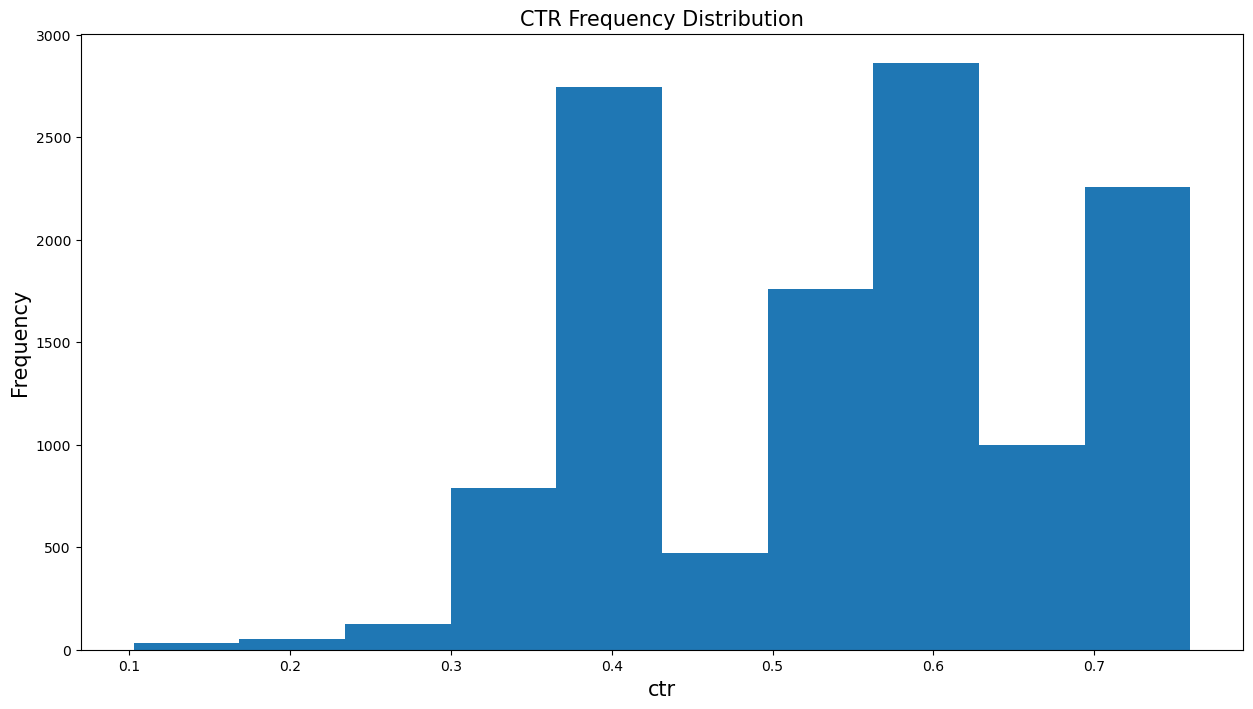

In [14]:
# ctr Frequency Distribution
# set the xlabel and the fontsize
plt.xlabel("ctr", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title("CTR Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(df.loc[(df["ctr"]>=0.1) & (df["ctr"]<=0.76)]['ctr'])
plt.show()

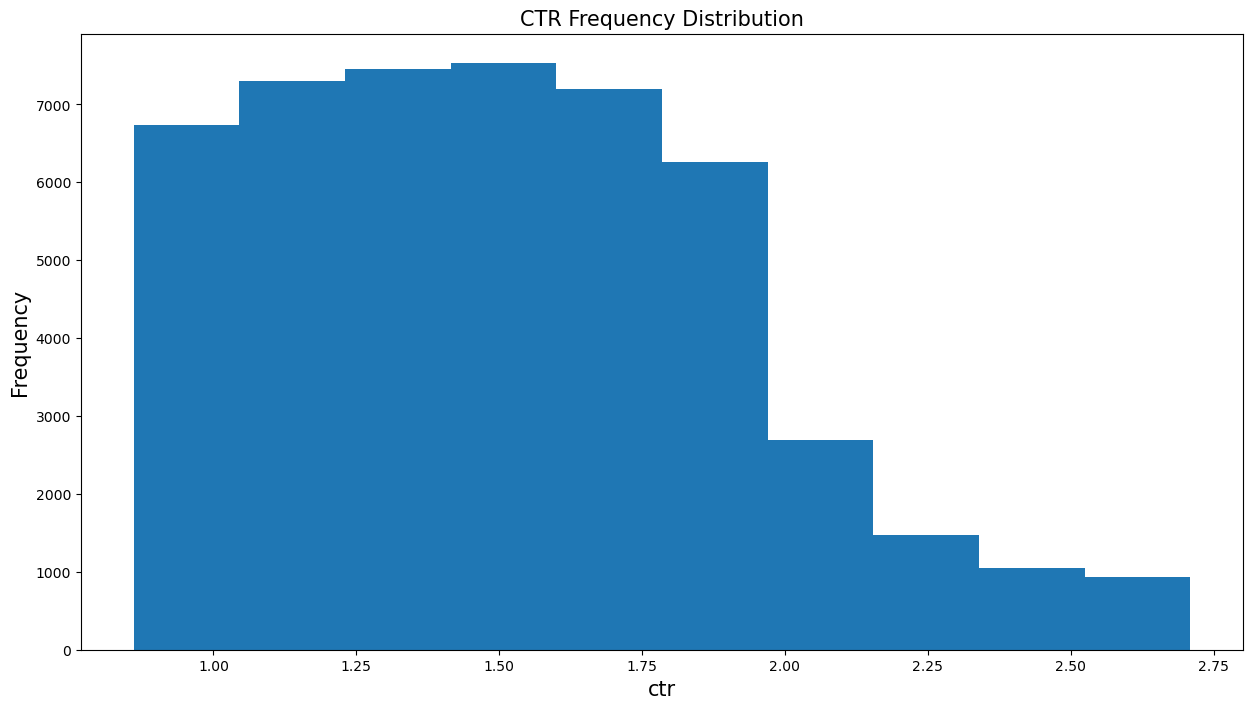

In [15]:
# ctr Frequency Distribution
# set the xlabel and the fontsize
plt.xlabel("ctr", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title("CTR Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(df.loc[(df["ctr"]>0.86) & (df["ctr"]<=2.71)]['ctr'])
plt.show()

## **SCATTER PLOT**
Scatter plots' primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole
#### USES:


1. To identify patterns and relationships: By examining the dots on the scatter plot, it is possible to identify any patterns or relationships between the two variables being plotted. For example, if the dots form a straight line that slopes upwards, it suggests a positive correlation between the variables.

2. To detect outliers: Scatter plots can help identify outliers that may be due to measurement errors or other factors.

3. To visualize trends over time: Scatter plots can also be used to visualize trends over time. 



---


##**`STORY TIME`**

1. We can see as the number of days increases the number of impressions and clicks decreases which implies that for long campaigns optimization based on performance metric i.e CTR is needed otherwise the budget will be exhausted but performance will remain poor.

2. We can check spent vs days to know how the budget is pacing and further verify different scenarios like : whether the campaign is over spending while giving good performance , are there any campaigns which arent able to exhaust their budget as well as giving bad performance , whether there are campaigns which are having good performance but unable to spend their budget.

3. We can also see that for campaigns having longer duration the performance is sort of constant & gathered low impressions as well as clicks which can put emphasis on the fact that the awareness for the product X isnt much among the audience and hence the top of the marketing funnel shall be focused too. 

4. The graphs below can also signify that most of the campaigns having less duration were newly created or were paused in between due to poor performance , so calculating remanining number of days , budget left and current + required performance is necessary.

5. We can also spot outliers in both the graphs which indicates sudden spikes in the impressions and clicks which maybe due to certain events such as festivals , social media popularity , etc . We can further analyse at what time of the day , on which days , in which season , festivals , national or public holidays the performance usually goes up.




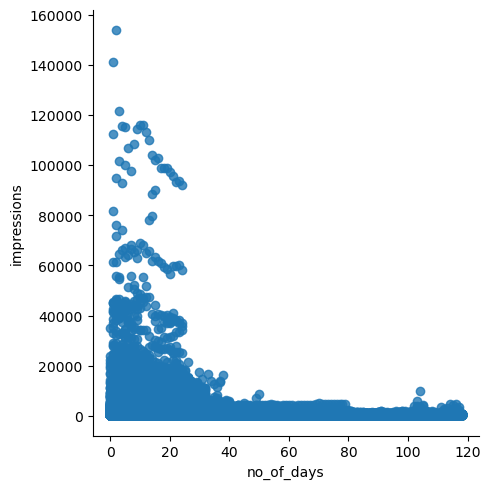

In [16]:
# scatter plot : no_of_days vs impressions
sns.lmplot(data=df, x="no_of_days", y="impressions")

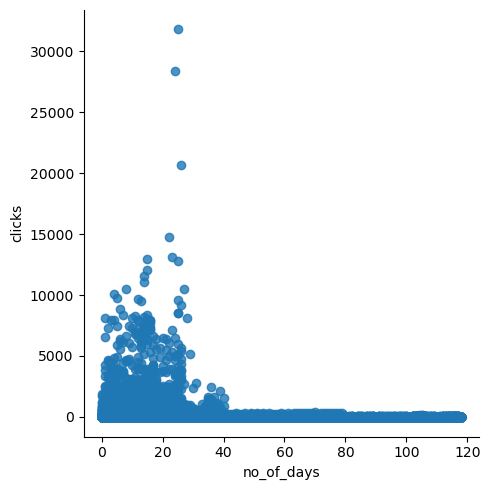

In [17]:
# scatter plot : no_of_days vs clicks
sns.lmplot(data=df, x="no_of_days", y="clicks")

##**`STORY TIME`**

1. Mobile campaigns are able to get higher clicks ,hence if some campaign is under performing for a quite few days and needs to be paused then we can shift its budget and give it to mobile campaigns.
2. The performance of search campaigns needs to be improved , since we see that the impressions and clicks gained by these campaigns relatively lower . We shall focus on using good keywords , search tags and Call to Actions to improve performance of search campaigns.
3. Social campaigns are able to reach audiences more but unable to get conversions , so we can focus on enhanching our creatives more.

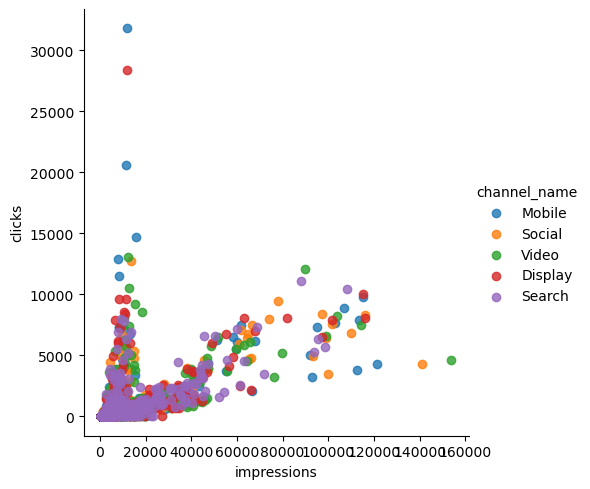

In [18]:
# scatter plot : impressions vs clicks ( hue : channel_name )
sns.lmplot(x = "impressions", y = "clicks", data = df, fit_reg=False, hue='channel_name')


## **PIE CHART**
A pie chart is a circular chart divided into slices or wedges, where each wedge represents a proportion or percentage of the whole. Pie charts are often used to display the relative sizes of different categories in a dataset.
#### USES:


1. To show the distribution of categorical data: Pie charts can be used to display the proportion of data points that belong to each category. This can be useful for showing the distribution of data across different categories.

2. To compare proportions: By comparing the sizes of the different wedges, it is possible to see which categories are more or less prevalent.

3. To highlight important information: Pie charts can be a useful tool for highlighting important information in a dataset. For example, if one wedge of the pie chart is significantly larger than the others, it can draw attention to a particularly important category. 



---

##**`STORY TIME`**
 
1. Top 3 countries where the campaigns are running are Oman , Qatar & UAE which means the company mainly operates in the Middle East region hence while optimizating the campaigns in these countries we must narrow down our targeting options , use arabic words in ads , creatives and also in search tags , focus on major festivals or celebrations like Ramdan , etc.
2. We can further find out performance metrics of each country vs budget they were alloted to gauge the relative performance and take more informed decision.

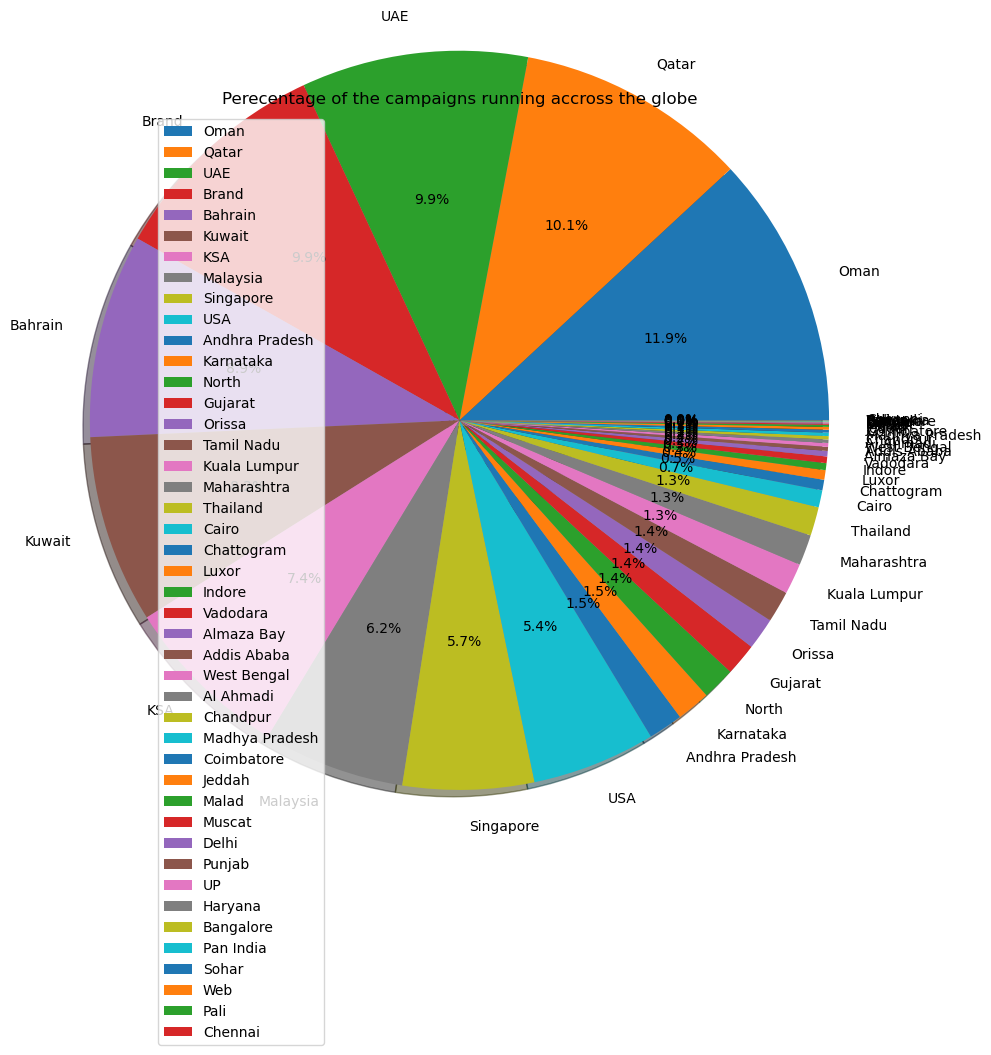

In [19]:
figsize = ()
label = df['advertiser_name'].value_counts().index
name = df['advertiser_name'].value_counts()
plt.pie(name,labels = label,shadow = True,autopct='%1.1f%%',radius = 1.5)
plt.title('Perecentage of the campaigns running accross the globe')
plt.legend()
plt.show()
     


## **HEATMAP**
A heatmap is a type of data visualization that displays the density of data points using color. Heatmaps are often used to display large amounts of data in a way that is easy to understand. 
#### USES:

They are majorly used for finding correlations between variables . Heatmaps are particularly useful when dealing with large datasets that contain many variables or when trying to find patterns in data that would be difficult to see using other types of data visualizations



---

##**`STORY TIME`**
 
The heatmap below shows the highest correlation between media_cost_usd and impressions of 0.93 and 0.61 between media_cost_usd and clicks which doesnt actually suggests that for better performance we must keep on increasing our spent . We msut be very carefull while assessing correlations between different variables based on the heatmap.

In [20]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df.corr()

# print the correlation matrix
corrmat

,campaign_item_id,no_of_days,ext_service_id,creative_id,creative_width,creative_height,template_id,advertiser_id,network_id,approved_budget,channel_id,network_margin,campaign_budget_usd,impressions,clicks,exchange_rate,media_cost_usd,ctr
campaign_item_id,1.000000,-0.627128,0.004442,0.629882,0.720578,0.720578,0.634469,0.785481,0.812171,-0.055684,-0.000412,NaN,-0.043859,-0.033682,-0.032596,NaN,-0.036411,-0.043566
no_of_days,-0.627128,1.000000,-0.006645,-0.412571,-0.551147,-0.551147,-0.464918,-0.633059,-0.642509,-0.115369,-0.003310,NaN,-0.004802,-0.113251,-0.059006,NaN,-0.090268,-0.071231
ext_service_id,0.004442,-0.006645,1.000000,0.001587,0.002927,0.002927,0.002321,0.002029,0.002778,-0.001092,-0.001832,NaN,-0.000248,0.002039,0.002225,NaN,0.003464,0.002383
creative_id,0.629882,-0.412571,0.001587,1.000000,0.197148,0.197148,0.101059,0.499234,0.474506,-0.027800,-0.000577,NaN,0.030049,0.032815,0.044518,NaN,0.040575,0.032717
creative_width,0.720578,-0.551147,0.002927,0.197148,1.000000,1.000000,0.986752,0.740611,0.716923,-0.080317,0.003838,NaN,-0.150596,-0.116527,-0.103797,NaN,-0.124898,-0.121192
creative_height,0.720578,-0.551147,0.002927,0.197148,1.000000,1.000000,0.986752,0.740611,0.716923,-0.080317,0.003838,NaN,-0.150596,-0.116527,-0.103797,NaN,-0.124898,-0.121192
template_id,0.634469,-0.464918,0.002321,0.101059,0.986752,0.986752,1.000000,0.659412,0.624832,-0.108815,0.004375,NaN,-0.188118,-0.155780,-0.134447,NaN,-0.161298,-0.153461
advertiser_id,0.785481,-0.633059,0.002029,0.499234,0.740611,0.740611,0.659412,1.000000,0.815637,0.005148,0.002286,NaN,-0.050438,-0.012835,-0.025677,NaN,-0.031488,-0.047078
network_id,0.812171,-0.642509,0.002778,0.474506,0.716923,0.716923,0.624832,0.815637,1.000000,0.041281,-0.000650,NaN,0.018607,0.049847,0.031333,NaN,0.030625,0.024005
approved_budget,-0.055684,-0.115369,-0.001092,-0.027800,-0.080317,-0.080317,-0.108815,0.005148,0.041281,1.000000,0.000686,NaN,0.092939,0.200683,0.110463,NaN,0.149966,0.172573


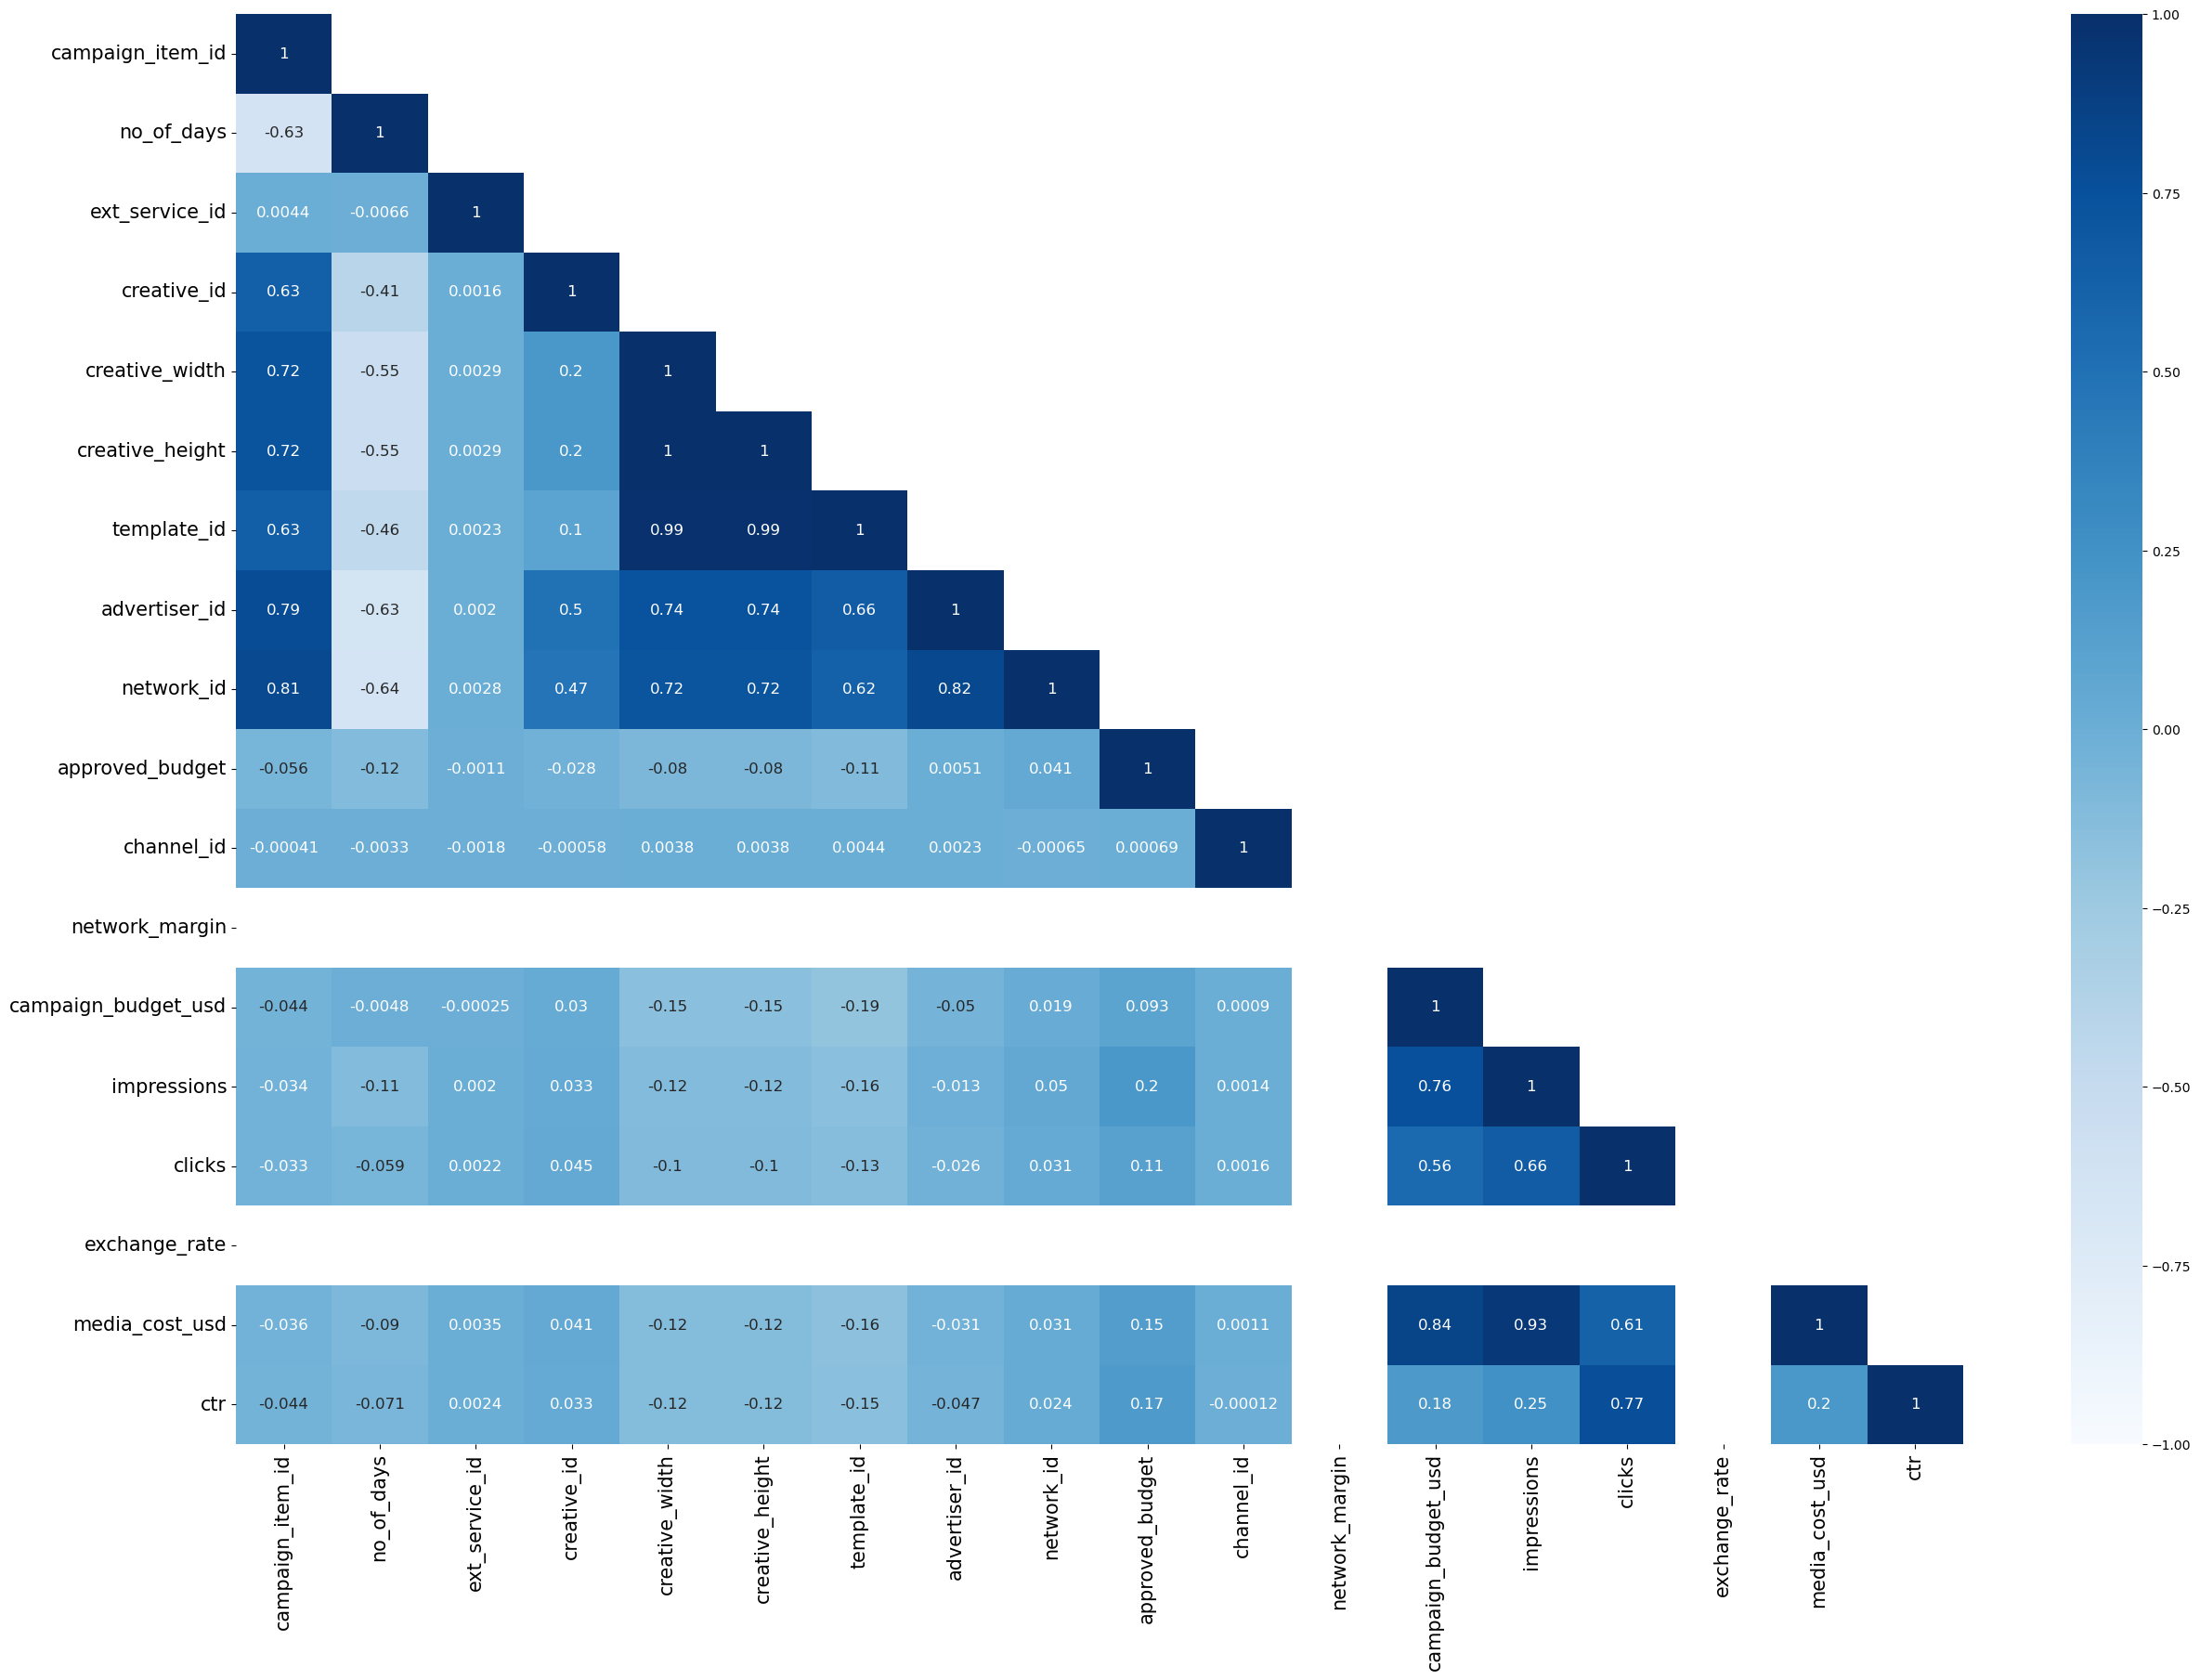

In [21]:
# set the plot size
# pass the required height and width to the parameter, 'figsize'  
plt.figure(figsize = (30,20))

# use 'mask' to plot a upper triangular correlation matrix 
# 'tril_indices_from' returns the indices for the lower-triangle of matrix
# 'k = -1' consider the diagonal of the matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k = 1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

## **LINE CHART**
A line chart is a type of graph used to display data trends over time. It is a visual representation of a series of data points, with each point representing a specific value for a given time period. The points are then connected by a straight line, which shows the trend of the data over time. 
#### USES:

Line charts are commonly used in many fields such as finance, economics, social sciences, and engineering. They can be used to track trends over time, such as stock prices, population growth, and weather patterns. They can also be used to compare multiple data sets on the same chart, making it easier to identify patterns and trends.

Line charts are a simple and effective way to display data trends over time. They are easy to read and interpret, making them a popular choice for data visualization.

---

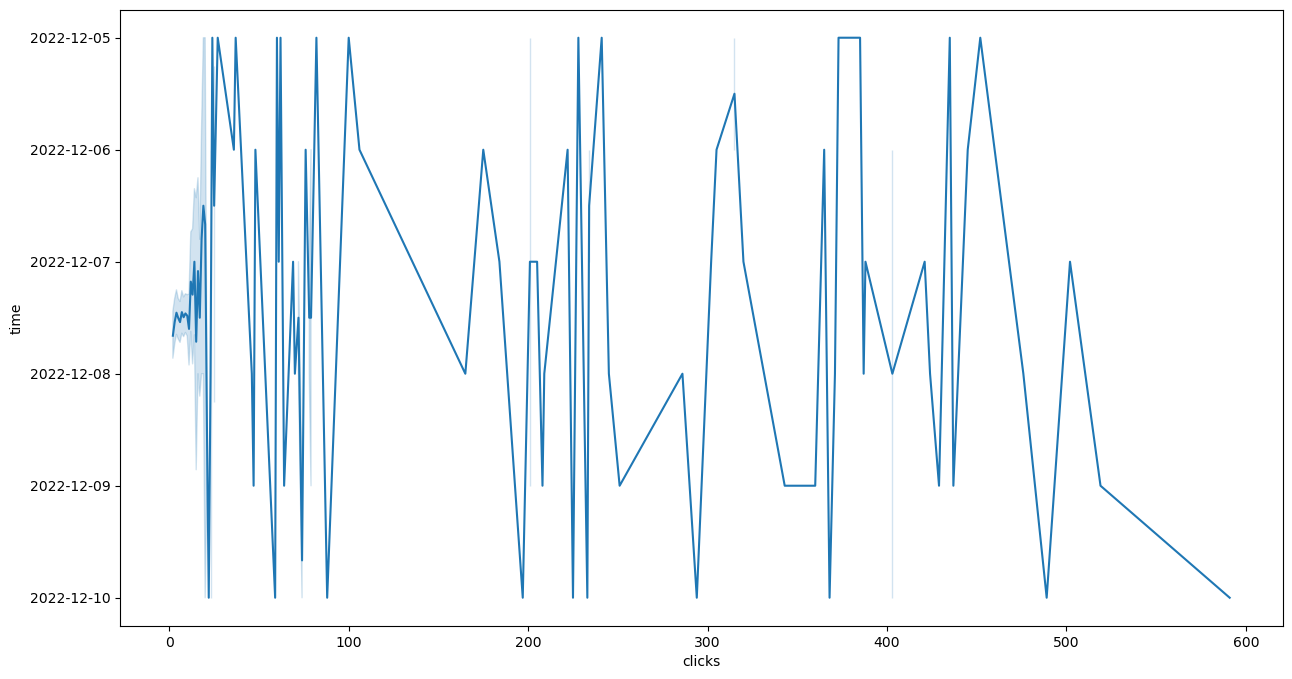

In [22]:
# draw lineplot
sns.lineplot(x="clicks", y="time", data=df.loc[ (df['time']>='2022-12-05') & (df['time']<='2022-12-10') ] )
plt.show()

## **ASSIGNMENT** : 🧑 📖
Use any graph or chart and make your visualization using columns given in the dataset and try to derive basic insights from it.

# **PREDICTION**

Prediction in machine learning refers to the process of using an algorithm to make an educated guess about the outcome of a future event based on historical data. This process involves training a machine learning model on a dataset containing inputs (also known as features) and corresponding outputs (also known as labels), and then using that model to make predictions on new, unseen data.

**For example**, a machine learning model could be trained on a dataset of housing prices and features such as the number of bedrooms, location, and square footage. Once the model is trained, it can be used to predict the price of a new home based on those same features.



---



## **Simple linear regression**

Linear regression is a statistical technique used to find the relationship between two variables, where one variable (called the independent variable) is used to predict the value of the other variable (called the dependent variable).


The slope of the line represents the strength and direction of the relationship between the two variables, while the intercept represents the value of the dependent variable when the independent variable is zero.


> **Equation** is : y=w0 + w1*x`

* where X is the independent variable and it is plotted along the x-axis
* Y is the dependent variable and it is plotted along the y-axis
* w0 and w1 are the coefficents , basically intercept and slope of the line


**Formula for calculating coefficients**

> w1 = Σ[(xi - x_mean)(yi - y_mean)]/Σ[(xi - x_mean)^2 ]

> w0 = y_mean - (w1 * x_mean)

* Where xi and yi are the data points of the X and Y attributes
* And x_mean and y_mean are the mean values of X and Y attributes

In [23]:
def simple_linear_regression(dataset,X,Y):

  # here the dataset parameter can be train dataset or test dataset 
  # X, Y are the attributes of the dataset that are to be used for simple linear regression

  # Values method : Only the values in the DataFrame will be returned, the axes labels will be removed.
  X_values = dataset[X].values 
  Y_values = dataset[Y].values

  # calculating mean for X , Y attributes
  x_mean = np.mean(X_values)
  y_mean = np.mean(Y_values)

  # total values 
  n=len(X_values)

  # caluculating w1 
  numerator = 0
  denominator = 0

  for i in range(n):

    numerator += (X_values[i] - x_mean)* (Y_values[i] - y_mean)
    denominator += (X_values[i] - x_mean) **2 

  w1 = numerator / denominator

  # calculating w0
  w0 = y_mean - (w1 * x_mean)

  # predicted response 
  Y_predicted = w0 + w1*X_values

  ans=[X_values, Y_values, Y_predicted, w0, w1]

  return ans
     


For simple regression we need two variables X ( independent variable ) and Y ( dependent variable ) . So, from this dataset I'll be choosing media_cost_usdattribute as X and CTR attribute as Y.


In [24]:
# splitting dataset into 70:30 ratio

# Defining train size
train_size = int(0.7 * len(df))

# Splitting dataset
train_set = df[:train_size]
test_set = df[train_size:]

## Visualizing the regression line and scatter plot of train set

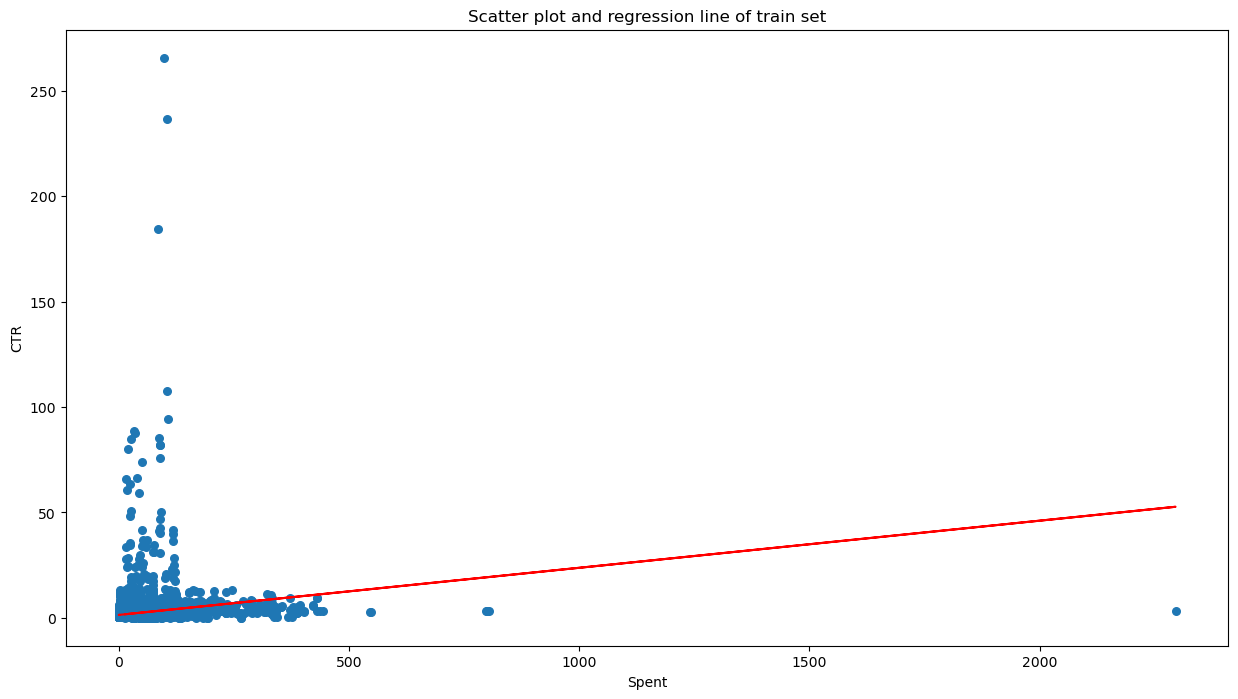

In [25]:
ans_train = simple_linear_regression(train_set,'media_cost_usd','ctr')

plt.scatter(ans_train[0],ans_train[1],marker = "o" , s=30)

# plotting the regression line
plt.plot(ans_train[0],ans_train[2],color="red")

plt.title('Scatter plot and regression line of train set')
plt.xlabel('Spent')
plt.ylabel('CTR')
plt.show()

## Visualizing the regression line and scatter plot of test set

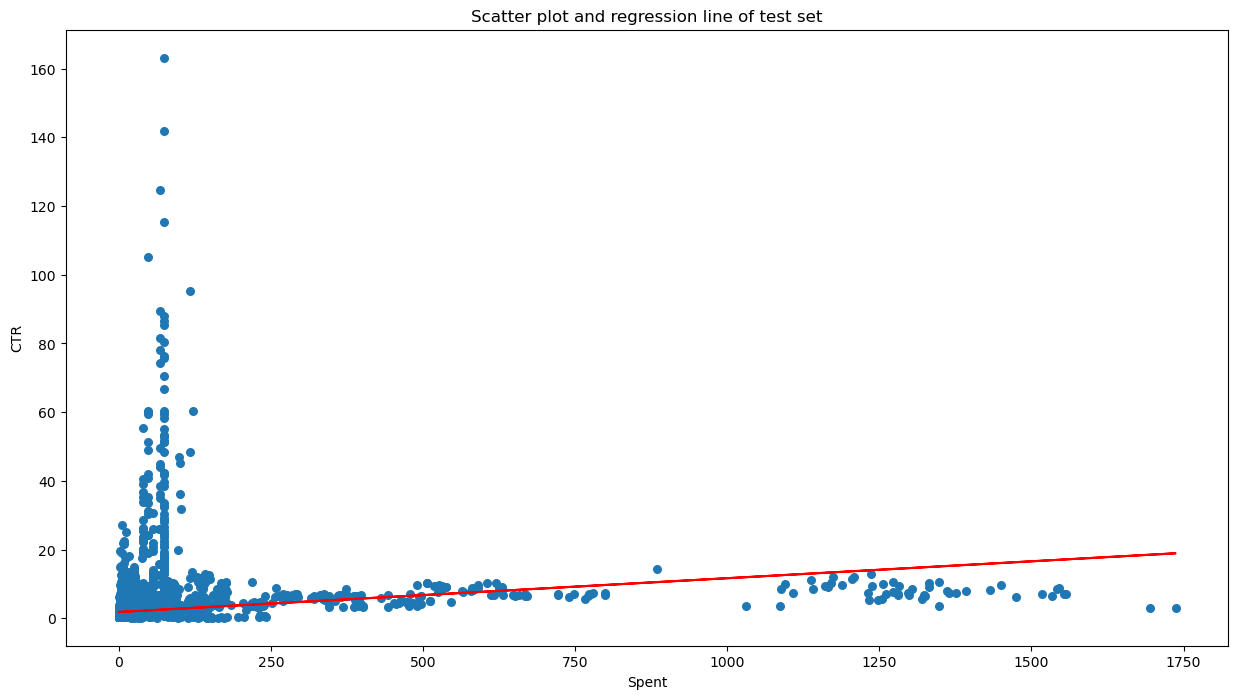

In [26]:
ans_test = simple_linear_regression(test_set,'media_cost_usd','ctr')

plt.scatter(ans_test[0],ans_test[1],marker = "o" , s=30)

# plotting the regression line
plt.plot(ans_test[0],ans_test[2],color="red")

plt.title('Scatter plot and regression line of test set')
plt.xlabel('Spent')
plt.ylabel('CTR')
plt.show()


## Predicting value using test set

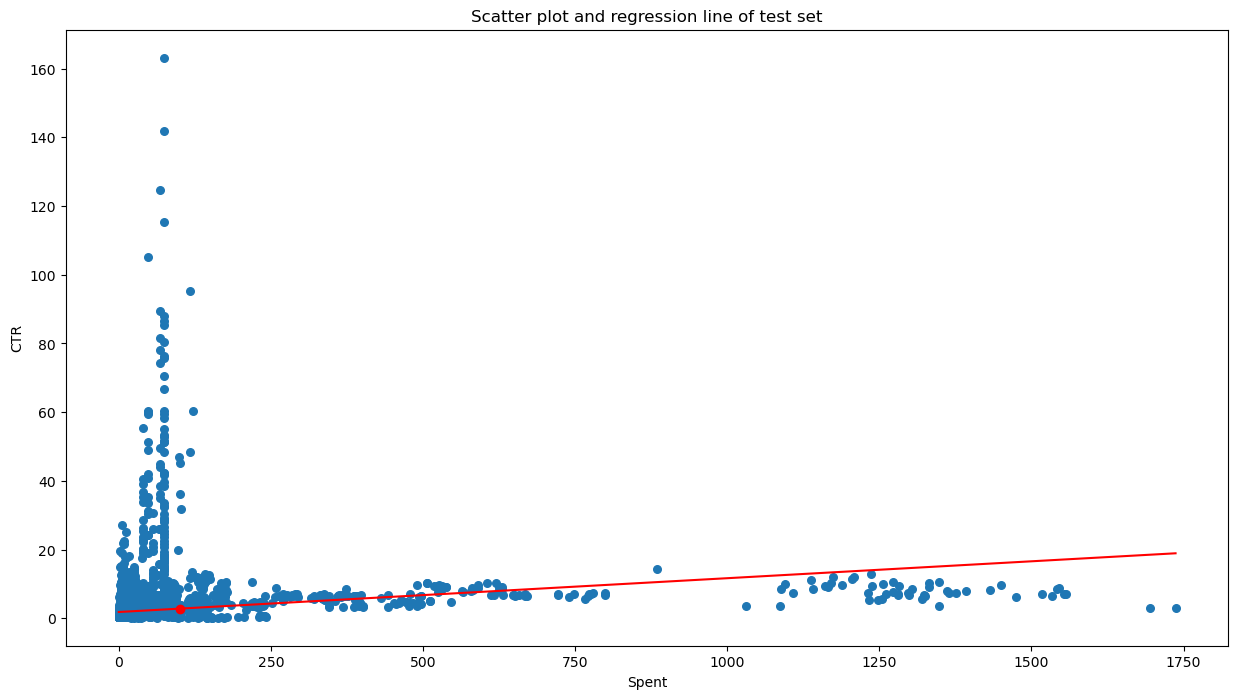

In [27]:
x = np.linspace(np.max(ans_test[0]),np.min(ans_test[0]),100) # Linspace :  is used to create an evenly spaced sequence in a specified interval.
y = ans_test[3] + ans_test[4]*x # predicting responses 

# predicting CTR
x1=100
y1=ans_test[3]+ans_test[4]*x1
plt.plot(x1,y1,'ro') # plotting that single point

# plotting the regression line
plt.plot(x,y,color="red")

# scatter plot
plt.scatter(ans_test[0],ans_test[1],marker = "o" , s=30)

plt.title('Scatter plot and regression line of test set')
plt.xlabel('Spent')
plt.ylabel('CTR')
plt.show()


##Finding accuracy of the model using Mean absolute error , Mean squarred error and Root mean squarred error 

### **NOTE** :
* **MSE** calculates the average squared difference between the predicted values and the actual values of the target variable in the test set.
* A **MSE score of 14** means that on average, the model's predictions are off by the square root of 14 (which is approximately 3.7 units) compared to the actual values.
* **MAE** calculates the average absolute difference between the predicted values and the actual values of the target variable in the test set.
* For example, **if the MAE score is 1**, it means that on average, the model's predictions are off by 1 unit compared to the actual values.
* **MSE AND MAE **values ideally must be lower.

In [28]:
# mean absolute error
def MAE():
  mae_sum = 0
  for y_,x_ in zip(ans_test[1],ans_test[0]):
      prediction = ans_test[3]+ans_test[4]*x_ # y=w0+w1*x
      mae_sum += abs(y_ - prediction)
  mae = mae_sum / len(ans_test[1])

  return mae

# mean squared error
def MSE():
  mse_sum = 0
  for y_, x_ in zip(ans_test[1],ans_test[0]):
      prediction = ans_test[3]+ans_test[4]*x_ # y=w0+w1*x
      mse_sum += (y_ - prediction)**2
  mse = mse_sum / len(ans_test[1])

  return mse

# root mean squared error
def RMSE():
  return MSE()**0.5

In [29]:
print("Mean absolute error : ",MAE())
print("Mean squarred error : ",MSE())
print("Root mean squared error : ",RMSE())

Mean absolute error :  1.0492220543221997
Mean squarred error :  14.359562930764161
Root mean squared error :  3.7894013947804686


# **THANKYOU**: 🔰

1. LinkedIn : https://www.linkedin.com/in/riya-joshi-8999961a3/ 
2. Github : https://github.com/riya-joshi-401 
3. Medium : https://medium.com/@riya.joshi 